In [17]:
import astropy.units as u
from astropy.io.fits import getheader, Header
from astropy.io import fits
from specutils import Spectrum
from astrodb_utils.spectra import check_spectrum_plottable
from astrodb_utils.fits import check_header
from specutils import Spectrum1D, Spectrum
from astroquery.simbad import Simbad
from specutils.manipulation import median_smooth
import numpy as np
import os


In [18]:
files = ["/Users/guanying/SIMPLE Archive/SIMPLE-db/scripts/ingests/WISE_1810/data_target_WISE1810_comb_Jun2021_YJ_STD_bb.txt"
,"/Users/guanying/SIMPLE Archive/SIMPLE-db/scripts/ingests/WISE_1810/WISE1810m10_OB0001_R1000R_06Sept2020.txt"]

Reading /Users/guanying/SIMPLE Archive/SIMPLE-db/scripts/ingests/WISE_1810/data_target_WISE1810_comb_Jun2021_YJ_STD_bb.txt
The following keywords are not set in the header:
OBSERVAT : 
VOCLASS : Data model name and version
VOPUB : Publisher
VOREF : URL, DOI, or bibcode of original publication
TITLE : Dataset title 
AUTHOR : Authors of the original dataset
CONTRIB1 : Contributor who generated this file
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
SPEC_VAL : [angstrom] Characteristic spectral coordinate
SPEC_BW : [angstrom] width of spectrum
TDMIN1 : Start in spectral coordinate
TDMAX1 : Stop in spectral coordinate
SPECBAND : SED.bandpass
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 18h10m06.18s -10d10m00.3s
SIMBAD results for object name CWISEP J181006.00-101001.1:         main_id              ra    ...         matched_id        
                            deg    ...                           
------------------------ --------- ... -

/var/folders/dq/78yjnq7132j29_6kkvh6zxtw0000gn/T/ipykernel_79670/3332631761.py:43: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  check_header(header)


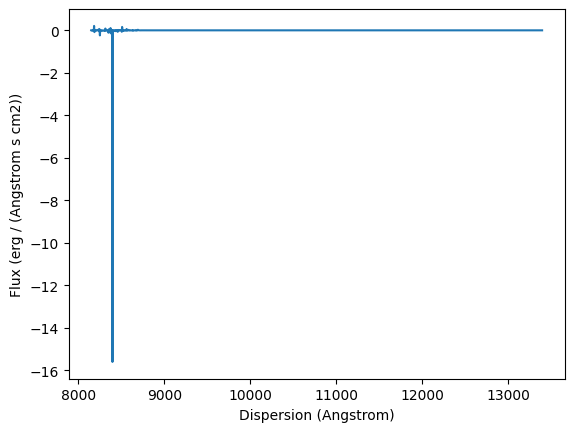

/Users/guanying/SIMPLE Archive/SIMPLE-db/scripts/ingests/WISE_1810/data_target_WISE1810_comb_Jun2021_YJ_STD_bb.txt is plottable
Reading /Users/guanying/SIMPLE Archive/SIMPLE-db/scripts/ingests/WISE_1810/WISE1810m10_OB0001_R1000R_06Sept2020.txt
The following keywords are not set in the header:
OBSERVAT : 
VOCLASS : Data model name and version
VOPUB : Publisher
VOREF : URL, DOI, or bibcode of original publication
TITLE : Dataset title 
AUTHOR : Authors of the original dataset
CONTRIB1 : Contributor who generated this file
TMID : [d] MJD of exposure mid-point
TELAPSE : [s] Total elapsed time (s)
SPEC_VAL : [angstrom] Characteristic spectral coordinate
SPEC_BW : [angstrom] width of spectrum
TDMIN1 : Start in spectral coordinate
TDMAX1 : Stop in spectral coordinate
SPECBAND : SED.bandpass
APERTURE : [arcsec] slit width
coordinates converted to sexagesimal: 18h10m06.18s -10d10m00.3s
SIMBAD results for object name CWISEP J181006.00-101001.1:         main_id              ra    ...         matc

/var/folders/dq/78yjnq7132j29_6kkvh6zxtw0000gn/T/ipykernel_79670/3332631761.py:43: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  check_header(header)


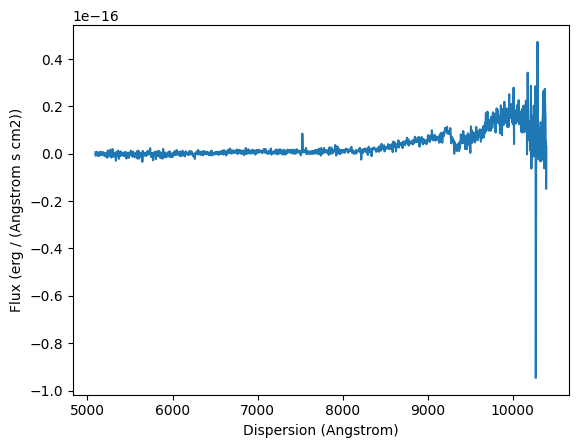

/Users/guanying/SIMPLE Archive/SIMPLE-db/scripts/ingests/WISE_1810/WISE1810m10_OB0001_R1000R_06Sept2020.txt is plottable


In [19]:
for file in files:

    # Read the data, assuming 2 columns: wavelength and flux
    data = np.loadtxt(file, comments="#")

    print(f"Reading {file}")

    wave = data[:, 0] * u.AA
    flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)


    # create spectrum object
    spectrum = Spectrum1D(spectral_axis=wave, flux=flux)

    # convert spectrum
    header = Header()
    header.set('OBJECT', "CWISEP J181006.00-101001.1")
    header.set('BUNIT', "erg / (cm2 s Angstrom)")
    header.set('TELESCOP', "GTC")

    try:
        result = Simbad.query_object("CWISEP J181006.00-101001.1")
        header["RA_TARG"] = result[0]["ra"]
        header["DEC_TARG"] = result[0]["dec"]
    except Exception as e:
        print(f"Error getting ra/deg: {e}")

    
    header.set('RA_TARG', 272.52575) # got from simbad
    header.set('DEC_TARG', -10.16675)

    # Different instruments used on same object
    if ("/Users/guanying/SIMPLE Archieve/SIMPLE-db/scripts/ingests/WISE_1810/data_target_WISE1810_comb_Jun2021_YJ_STD_bb.txt" in file):
        header.set('DATE-OBS', "2021-06-01T00:00:00")
        header.set('INSTRUME', "EMIR")

    else:
        header.set('DATE-OBS', "2020-09-06T00:00:00")
        header.set('INSTRUME', "OSIRIS")
        header

    spectrum.meta["header"] = header
    check_header(header)


    # add Spectrum to FITS file
    output_file = os.path.splitext(file)[0] + ".fits"
    spectrum.write(output_file, format="tabular-fits", overwrite=True)
    print(f"Wrote {output_file}")



    # check plotability
    if check_spectrum_plottable(spectrum, show_plot=True):
        print(f"{file} is plottable")

